![](https://velog.velcdn.com/images/hyejinbeck/post/9d60c960-912d-48e9-b375-6331e8913065/image.png)


![](https://velog.velcdn.com/images/hyejinbeck/post/f3b13344-c1eb-4ea3-9826-78a7d3052a20/image.png)

![](https://velog.velcdn.com/images/hyejinbeck/post/23f0c90b-9fb3-44ea-ba49-766898f3a821/image.png)

In [486]:
# 설치 파일
# ! pip install -r requirements.txt

In [426]:
# 필요함수
import pandas as pd 

In [427]:
# 불러오기
data = pd.read_csv('./Dataset/Dataset_02.csv')

In [428]:
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [429]:
# 데이터 확인 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


# 부합조건 찾기

In [430]:
# 컬럼확인
data.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [431]:
# 환자 조건1 : 여자
data['Sex'].unique()

array(['F', 'M'], dtype=object)

In [432]:
# 환자 조건2 : 혈압 High
data['BP'].unique()

array(['HIGH', 'LOW', 'NORMAL'], dtype=object)

In [433]:
# 환자 조건3 : 콜레스테롤 Normal
data['Cholesterol'].unique()

array(['HIGH', 'NORMAL'], dtype=object)

In [434]:
# 조건(성별,콜레스테롤) 걸어서 확인
pd.crosstab(
    index=[data.Sex],              # 성별
    columns = data.Cholesterol     # 콜레스테롤
)

Cholesterol,HIGH,NORMAL
Sex,,
F,49,47
M,54,50


In [435]:
# 조건(성별+혈압,콜레스테롤) 걸어서 확인
pd.crosstab(
    index=[data.Sex,  data.BP],   # 성별 + 혈압
    columns = data.Cholesterol,   # 콜레스테롤 
)

Cholesterol  HIGH  NORMAL
Sex BP                   
F   HIGH       17      21
    LOW        14      14
    NORMAL     18      12
M   HIGH       18      21
    LOW        17      19
    NORMAL     19      10

In [436]:
# 조건(성별+혈압,콜레스테롤)의 각 비율(빈도)
pd.crosstab(
    index=[data.Sex,  data.BP],   # 성별 + 혈압
    columns = data.Cholesterol,   # 콜레스테롤 
    normalize=True,
)

Cholesterol   HIGH  NORMAL
Sex BP                    
F   HIGH     0.085   0.105
    LOW      0.070   0.070
    NORMAL   0.090   0.060
M   HIGH     0.090   0.105
    LOW      0.085   0.095
    NORMAL   0.095   0.050

In [437]:
# 조건 부합되는 특정값 추출 
q1=\
pd.crosstab(
    index=[data.Sex,  data.BP],   # 성별 + 혈압
    columns = data.Cholesterol,   # 콜레스테롤 
    normalize=True,
)

q1.loc[('F', 'HIGH'), 'NORMAL']

0.105

#  변수생성(수치형->범주형)

In [438]:
# 기존데이터 복사
q2 = data.copy()

In [439]:
q2.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [440]:
# 나이 Age (수치형) 컬럼 확인
q2['Age'].describe()

count    200.000000
mean      44.315000
std       16.544315
min       15.000000
25%       31.000000
50%       45.000000
75%       58.000000
max       74.000000
Name: Age, dtype: float64

In [441]:
# 칼륨대비나트륨비율 Na_to_K (수치형) 컬럼 확인
q2['Na_to_K'].describe()

count    200.000000
mean      16.084485
std        7.223956
min        6.269000
25%       10.445500
50%       13.936500
75%       19.380000
max       38.247000
Name: Na_to_K, dtype: float64

In [442]:
# 컬럼생성np위한 함수
import numpy as np

In [443]:
# 나이 Age 관련 컬럼 생성 (수치형 --> 범주형 )

q2['Age_gr'] = np.where(q2.Age < 20 , 10 ,           # Age가 20미만이면 10, 아니면 
                        np.where(q2.Age < 30 , 20 , 
                                 np.where(q2.Age < 40 , 30 , 
                                          np.where(q2.Age < 50 , 40 ,
                                                   np.where(q2.Age < 60 , 50 , 
                                                            60   )))))
q2

,Age,Sex,BP,Cholesterol,Na_to_K,Drug,Age_gr
0,23,F,HIGH,HIGH,25.355,DrugY,20
1,47,M,LOW,HIGH,13.093,drugC,40
2,47,M,LOW,HIGH,10.114,drugC,40
3,28,F,NORMAL,HIGH,7.798,drugX,20
4,61,F,LOW,HIGH,18.043,DrugY,60
...,...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC,50
196,16,M,LOW,HIGH,12.006,drugC,10
197,52,M,NORMAL,HIGH,9.894,drugX,50
198,23,M,NORMAL,NORMAL,14.020,drugX,20


In [444]:
# 칼륨대비나트륨비율 Na_to_K 관련 컬럼 생성 (수치형 --> 범주형 )

q2['Na_K_gr'] = np.where(q2.Na_to_K <= 10 , 'Lv1',           # Na_to_k가 10이하면 'Lv1'로 
                        np.where(q2.Na_to_K <= 20 , 'Lv2', 
                                 np.where(q2.Na_to_K <= 30 , 'Lv3',
                                          'Lv4' )))
q2

,Age,Sex,BP,Cholesterol,Na_to_K,Drug,Age_gr,Na_K_gr
0,23,F,HIGH,HIGH,25.355,DrugY,20,Lv3
1,47,M,LOW,HIGH,13.093,drugC,40,Lv2
2,47,M,LOW,HIGH,10.114,drugC,40,Lv2
3,28,F,NORMAL,HIGH,7.798,drugX,20,Lv1
4,61,F,LOW,HIGH,18.043,DrugY,60,Lv2
...,...,...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC,50,Lv2
196,16,M,LOW,HIGH,12.006,drugC,10,Lv2
197,52,M,NORMAL,HIGH,9.894,drugX,50,Lv1
198,23,M,NORMAL,NORMAL,14.020,drugX,20,Lv2


# 독립성 검정 (샘플용으로 하나만)

```
문자형String 타입의 독립성 검정 == 카이스퀘어
```

In [445]:
# 카이스퀘어 함수 설치
# !pip install scipy

In [446]:
# 카이스퀘어 함수
from scipy.stats import chi2_contingency

In [447]:
# x변수(Sex기준)으로 y변수(Drug)와의 빈도표
tab = pd.crosstab(index=q2['Sex'],columns=q2['Drug'])
tab

Drug,DrugY,drugA,drugB,drugC,drugX
Sex,,,,,
F,47,9,6,7,27
M,44,14,10,9,27


In [448]:
# x변수(Sex기준)으로 y변수(Drug)와의 빈도표로 카이스퀘어 검정 진행 

chi2_contingency(tab)

# 결과 
# 카이스퀘어 통계량 statistic 
# pvalue 
# 자유도 dof 
# 기대빈도 expected_freq (array형태) 

Chi2ContingencyResult(statistic=2.119248418109203, pvalue=0.7138369773987128, dof=4, expected_freq=array([[43.68, 11.04,  7.68,  7.68, 25.92],
       [47.32, 11.96,  8.32,  8.32, 28.08]]))

# 독립성 검정 (x변수들 반복문=자동화)¶

In [449]:
# 변수 확인
q2.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug', 'Age_gr',
       'Na_K_gr'],
      dtype='object')

In [450]:
# 필요 변수 x 
features = ['Sex','BP','Cholesterol','Age_gr','Na_K_gr']

In [451]:
# 검정진행 & pvalue값들만 담을 변수
answer = []

# 변수별 검정 진행 (반복문) + p-value만 추출 
for i in features : 
    tab = pd.crosstab(index=q2[i],columns=q2['Drug'])
    pvalue = chi2_contingency(tab)
    answer.append([i,pvalue])

answer

[['Sex',
  Chi2ContingencyResult(statistic=2.119248418109203, pvalue=0.7138369773987128, dof=4, expected_freq=array([[43.68, 11.04,  7.68,  7.68, 25.92],
         [47.32, 11.96,  8.32,  8.32, 28.08]]))],
 ['BP',
  Chi2ContingencyResult(statistic=143.2328718496999, pvalue=5.0417334144665895e-27, dof=8, expected_freq=array([[35.035,  8.855,  6.16 ,  6.16 , 20.79 ],
         [29.12 ,  7.36 ,  5.12 ,  5.12 , 17.28 ],
         [26.845,  6.785,  4.72 ,  4.72 , 15.93 ]]))],
 ['Cholesterol',
  Chi2ContingencyResult(statistic=19.609657681313475, pvalue=0.0005962588389856497, dof=4, expected_freq=array([[46.865, 11.845,  8.24 ,  8.24 , 27.81 ],
         [44.135, 11.155,  7.76 ,  7.76 , 26.19 ]]))],
 ['Age_gr',
  Chi2ContingencyResult(statistic=46.440652324723914, pvalue=0.0007010113024729462, dof=20, expected_freq=array([[ 5.46 ,  1.38 ,  0.96 ,  0.96 ,  3.24 ],
         [15.925,  4.025,  2.8  ,  2.8  ,  9.45 ],
         [16.835,  4.255,  2.96 ,  2.96 ,  9.99 ],
         [17.29 ,  4.37 ,  3.04 ,

In [452]:
# 반복문속, 변수별 빈도만 확인
pd.crosstab(index=q2[i],columns=q2['Drug'])

Drug,DrugY,drugA,drugB,drugC,drugX
Na_K_gr,,,,,
Lv1,0,7,5,4,22
Lv2,44,16,11,12,32
Lv3,35,0,0,0,0
Lv4,12,0,0,0,0


In [453]:
# pvalue값 확인
chi2_contingency(tab)

Chi2ContingencyResult(statistic=93.31006327437028, pvalue=1.1254641594413981e-14, dof=12, expected_freq=array([[17.29 ,  4.37 ,  3.04 ,  3.04 , 10.26 ],
       [52.325, 13.225,  9.2  ,  9.2  , 31.05 ],
       [15.925,  4.025,  2.8  ,  2.8  ,  9.45 ],
       [ 5.46 ,  1.38 ,  0.96 ,  0.96 ,  3.24 ]]))

In [454]:
# 검정진행 & pvalue값들만 담을 변수
answer = []

# 변수별 빈도표 에서 각각의 검정진행한 통계량만 추출
for i in features : 
    tab = pd.crosstab(index=q2[i],columns=q2['Drug'])
    pvalue = chi2_contingency(tab)[0]    # [0]카이스퀘어 통계량
    answer.append([i,pvalue])

answer

[['Sex', 2.119248418109203],
 ['BP', 143.2328718496999],
 ['Cholesterol', 19.609657681313475],
 ['Age_gr', 46.440652324723914],
 ['Na_K_gr', 93.31006327437028]]

In [455]:
# 검정진행 & pvalue값들만 담을 변수
answer = []

# 변수별 빈도표 에서 각각의 pvalue인덱스만 추출
for i in features : 
    tab = pd.crosstab(index=q2[i],columns=q2['Drug'])
    pvalue = chi2_contingency(tab)[1]    # [1]pvalue인덱스만
    answer.append([i,pvalue])

answer

[['Sex', 0.7138369773987128],
 ['BP', 5.0417334144665895e-27],
 ['Cholesterol', 0.0005962588389856497],
 ['Age_gr', 0.0007010113024729462],
 ['Na_K_gr', 1.1254641594413981e-14]]

In [456]:
# 검정진행 & pvalue값들만 담을 변수
answer = []

# 변수별 빈도표 에서 각각의 자유도만 추출
for i in features : 
    tab = pd.crosstab(index=q2[i],columns=q2['Drug'])
    pvalue = chi2_contingency(tab)[2]    # [2]자유도 dof 
    answer.append([i,pvalue])

answer

[['Sex', 4], ['BP', 8], ['Cholesterol', 4], ['Age_gr', 20], ['Na_K_gr', 12]]

In [457]:
# 검정진행 & pvalue값들만 담을 변수
answer = []

# 변수별 빈도표 에서 각각의 기대빈도만 추출 
for i in features : 
    tab = pd.crosstab(index=q2[i],columns=q2['Drug'])
    pvalue = chi2_contingency(tab)[3]    # [3]기대빈도 expected_freq(array형태) 
    answer.append([i,pvalue])

answer

[['Sex',
  array([[43.68, 11.04,  7.68,  7.68, 25.92],
         [47.32, 11.96,  8.32,  8.32, 28.08]])],
 ['BP',
  array([[35.035,  8.855,  6.16 ,  6.16 , 20.79 ],
         [29.12 ,  7.36 ,  5.12 ,  5.12 , 17.28 ],
         [26.845,  6.785,  4.72 ,  4.72 , 15.93 ]])],
 ['Cholesterol',
  array([[46.865, 11.845,  8.24 ,  8.24 , 27.81 ],
         [44.135, 11.155,  7.76 ,  7.76 , 26.19 ]])],
 ['Age_gr',
  array([[ 5.46 ,  1.38 ,  0.96 ,  0.96 ,  3.24 ],
         [15.925,  4.025,  2.8  ,  2.8  ,  9.45 ],
         [16.835,  4.255,  2.96 ,  2.96 ,  9.99 ],
         [17.29 ,  4.37 ,  3.04 ,  3.04 , 10.26 ],
         [15.015,  3.795,  2.64 ,  2.64 ,  8.91 ],
         [20.475,  5.175,  3.6  ,  3.6  , 12.15 ]])],
 ['Na_K_gr',
  array([[17.29 ,  4.37 ,  3.04 ,  3.04 , 10.26 ],
         [52.325, 13.225,  9.2  ,  9.2  , 31.05 ],
         [15.925,  4.025,  2.8  ,  2.8  ,  9.45 ],
         [ 5.46 ,  1.38 ,  0.96 ,  0.96 ,  3.24 ]])]]

# p-value값 찾기

In [458]:
# 검정진행 & pvalue값들만 담을 변수
answer = []

# 변수별 빈도표 에서 각각의 pvalue인덱스만 추출
for i in features : 
    tab = pd.crosstab(index=q2[i],columns=q2['Drug'])
    pvalue = chi2_contingency(tab)[1]    # [1]pvalue인덱스만
    answer.append([i,pvalue])

answer

[['Sex', 0.7138369773987128],
 ['BP', 5.0417334144665895e-27],
 ['Cholesterol', 0.0005962588389856497],
 ['Age_gr', 0.0007010113024729462],
 ['Na_K_gr', 1.1254641594413981e-14]]

In [459]:
# 데이터프레임화
answer = pd.DataFrame(
    answer, 
    columns = ['features','pvalue']  # 부여할 컬럼 작명
)
answer

,features,pvalue
0,Sex,7.138370e-01
1,BP,5.041733e-27
2,Cholesterol,5.962588e-04
3,Age_gr,7.010113e-04
4,Na_K_gr,1.125464e-14


In [460]:
# pvalue값이 유의수준보다 작으면 연관성이 있는 값
answer['pvalue']<0.05

0    False
1     True
2     True
3     True
4     True
Name: pvalue, dtype: bool

In [461]:
# 연관성 있는 값들만 데이터프레임화
answer[answer['pvalue']<0.05]     # Sex 제거됨

,features,pvalue
1,BP,5.041733e-27
2,Cholesterol,5.962588e-04
3,Age_gr,7.010113e-04
4,Na_K_gr,1.125464e-14


In [462]:
# 데이터프레임 중에서 pvalue값만 
answer[answer['pvalue']<0.05]['pvalue']

1    5.041733e-27
2    5.962588e-04
3    7.010113e-04
4    1.125464e-14
Name: pvalue, dtype: float64

In [463]:
# 데이터프레임 중에서 pvalue값 중에서 가장 큰 pvalue = Drug에 가장 영향력있음
answer[answer['pvalue']<0.05]['pvalue'].max()

0.0007010113024729462

In [464]:
# 데이터프레임 중에서 pvalue값 중에서 가장 큰 인덱스번호 = Drug에 가장 영향력있음
answer[answer['pvalue']<0.05]['pvalue'].idxmax()

3

In [465]:
for_drug = answer[answer['pvalue'] < 0.05]
for_drug_best = for_drug.loc[for_drug['pvalue'].idxmax()]
for_drug_best

features      Age_gr
pvalue      0.000701
Name: 3, dtype: object

In [466]:
for_drug_best.name

3

In [467]:
for_drug_best.features

'Age_gr'

In [468]:
for_drug_best.pvalue

0.0007010113024729462

# '처방된 약'의 영향력이 제일 큰 변수


In [469]:
print(f'Drug타입에 영향력을 많이 미치는 변수는 {for_drug_best.features}이고, p-value값은 {for_drug_best.pvalue:.5f}입니다.')

Drug타입에 영향력을 많이 미치는 변수는 Age_gr이고, p-value값은 0.00070입니다.


# 의사결정나무(수치형필수)

In [470]:
# 기존데이터 
q3 = data.copy()

In [471]:
# 데이터확인
q3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [472]:
# 수치형으로 바꾸어야할 범주형 변수 (object)
q3['Sex'].unique()

array(['F', 'M'], dtype=object)

In [473]:
# 수치형으로 바꾸어야할 범주형 변수 (object)
q3['BP'].unique()

array(['HIGH', 'LOW', 'NORMAL'], dtype=object)

In [474]:
# 수치형으로 바꾸어야할 범주형 변수 (object)
q3['Cholesterol'].unique()

array(['HIGH', 'NORMAL'], dtype=object)

In [475]:
# Sex 범주형 컬럼 --> int 수치형 컬럼 추가 (mapping방식)
mapping_sex = {'M': 0, 'F': 1}
q3['Sex_cd'] = q3['Sex'].replace(mapping_sex)

# M이면 0으로 변환, 아니면 1로 변환 
q3['Sex_cd'].unique()

array([1, 0])

In [476]:
# BP 범주형 컬럼 --> int 수치형 컬럼 추가 (mapping방식)
mapping_bp = {'LOW': 0, 'NORMAL': 1, 'HIGH': 2}
q3['BP_cd'] = q3['BP'].replace(mapping_bp)

# LOW면 0, NORMAL이면 1, HIGH면 2로 변환됨 확인 
q3['BP_cd'].unique()

array([2, 0, 1])

In [477]:
# Cholesterol 범주형 컬럼 --> int 수치형 컬럼 추가 (mapping방식)
mapping_ch = {'HIGH': 1, 'NORMAL':0}
q3['Ch_cd'] = q3['Cholesterol'].replace(mapping_ch)

# NORMAL이면 0, HIGH면 1  
q3['Ch_cd'].unique()

array([1, 0])

In [478]:
# 변수 확인 
q3.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug', 'Sex_cd', 'BP_cd',
       'Ch_cd'],
      dtype='object')

In [479]:
# 의사결정나무에 쓸 변수 
features = ['Age','Na_to_K','Sex_cd','BP_cd','Ch_cd']

In [480]:
# 의사결정나무모델 함수 셋팅 
# !pip install scikit-learn

In [481]:
# 의사결정나무모델 함수
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree

In [482]:
# 의사결정나무모델 적용 
model = DecisionTreeClassifier().fit(q3[features],q3.Drug)

In [483]:
# Root Node의 split features, split value 찾기
export_text(model, feature_names=features)

'|--- Na_to_K <= 14.83\n|   |--- BP_cd <= 1.50\n|   |   |--- BP_cd <= 0.50\n|   |   |   |--- Ch_cd <= 0.50\n|   |   |   |   |--- class: drugX\n|   |   |   |--- Ch_cd >  0.50\n|   |   |   |   |--- class: drugC\n|   |   |--- BP_cd >  0.50\n|   |   |   |--- class: drugX\n|   |--- BP_cd >  1.50\n|   |   |--- Age <= 50.50\n|   |   |   |--- class: drugA\n|   |   |--- Age >  50.50\n|   |   |   |--- class: drugB\n|--- Na_to_K >  14.83\n|   |--- class: DrugY\n'

In [484]:
q3.Drug.unique()       # 참고

array(['DrugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

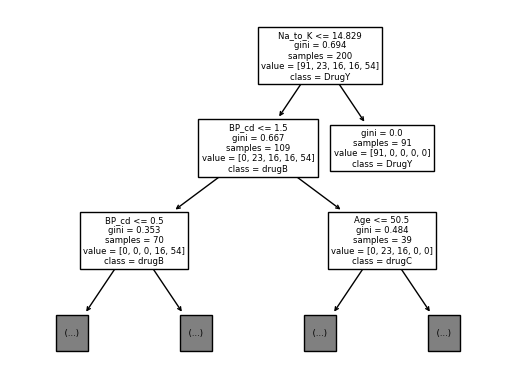

In [485]:
# 시각화
plot_tree(
    model,
    max_depth = 2,                     # 조건을 2로 가정 
    feature_names = features,         
    class_names = q3.Drug.unique(),   # 중복되지않게 y의 레이블이름만
    precision = 3                     # 소수점이하 표기단위 (소숫점 셋째자리까지만표기)
);

# 의사결정나무 Root Node의 split value
14.829 입니다. 

# 코드 정리

|문제|순서|코드|
|--|--|--|
||한꺼번에설치|!pip install -r requirements.txt|
||필요함수|import pandas as pd |
||불러오기|data = pd.read_csv('Dataset_02.csv')|
|1||여성으로 혈압High,콜레스테롤Normal인 환자의 <br>전체 대비 비율을 소숫점 세번째자리까지 구하라(반올림)|
||전체대비비율|q1=pd.crosstab(<br>index=[data.Sex,  data.BP],<br>columns = data.Cholesterol <br>normalize=True,)|
||해당 조건값만|q1.loc[('F', 'HIGH'), 'NORMAL']|
|2||Drug타입에 영향을 미치는지 확인하기위하여, 독립성 검정 수행 후<br>가장 연관성이 큰 p-value값의 소숫점 다섯번째자리까지 구하라|
||원본복사|q2 = data.copy()|
||컬럼생성함수<br>np.where절|import numpy as np|
||컬럼생성<br>수치형->범주형|q2['Age_gr'] =<br>np.where(q2.Age < 20, 10,<br>np.where(q2.Age < 30, 20,<br>np.where(q2.Age < 40, 30,<br>np.where(q2.Age < 50, 40,<br>np.where(q2.Age < 60, 50<br>,60)))))<br><br>q2['Na_k_gr'] =<br>np.where(q2.Na_to_k <= 10, 'Lv1',<br>np.where(q2.Na_to_k <= 20, 'Lv2',<br>np.where(q2.Na_to_k <= 30, 'Lv3',<br>'Lv4')))|
||독립성검정 설치|!pip install scipy|
||독립성검정 함수|from scipy.stats import chi2_contingency|
||독립성검정 변수|features = ['Sex','BP','Cholesterol','Age_gr','Na_K_gr']|
||변수x들 반복문<br>빈도표와 pvalue인덱스|answer=[]<br>for i in features : <br>tab = pd.crosstab(index=q2[i],columns=q2['Drug'])<br>pvalue = chi2_contingency(tab)[1]<br>answer.append([i,pvalue])|
||데이터프레임화|answer = pd.DataFrame(<br>answer, <br>columns = ['features','pvalue'])|
||유의수준이내,<br>가장 큰 pvalue|answer[answer['pvalue']<0.05]['pvalue'].max()|
||가장 영향력 있는 <br>변수와 p-value값 | for_drug = answer[answer['pvalue'] < 0.05]<br>for_drug_best = for_drug.loc[for_drug['pvalue'].idxmax()]<br>|
|3||의사결정나무를 수행하여,Root Node의 split value의 소숫점 셋째 자리까지 구하라(반올림)|
||원본복사|q3 = data.copy()|
||수치형mapping|mapping_sex = {'M': 0, 'F': 1}<br>q3['Sex_cd'] = q3['Sex'].replace(mapping_sex)<br>mapping_bp = {'LOW': 0, 'NORMAL': 1, 'HIGH': 2}<br>q3['BP_cd'] = q3['BP'].replace(mapping_bp)<br>mapping_ch = {'HIGH': 1, 'NORMAL':0}<br>q3['Ch_cd'] = q3['Cholesterol'].replace(mapping_ch)|
||함수 셋팅|!pip install scikit-learn|
||함수|from sklearn.tree import DecisionTreeClassifier, plot_tree|
||필요 변수|features = ['Age','Na_to_K','Sex_cd','BP_cd','Ch_cd']|
||모델적용|model = DecisionTreeClassifier().fit(q3[features],q3.Drug)|
||시각화|plot_tree(<br>model,<br>max_depth = 2,<br>feature_names = features,<br>class_names = q3.Drug.unique(),<br>precision = 3)                     # 소수점이하 표기단위 (소숫점 셋째자리까지만표기));|
|||Root Node의 split value는 14.829입니다.|
|||![](https://velog.velcdn.com/images/hyejinbeck/post/423383e2-54f2-4013-a05a-1015bd6d0804/image.png)|

# 다시 정리했으니, 이대로 외워라

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB
   Age Sex    BP Cholesterol  Na_to_K   Drug
0   23   F  HIGH        HIGH   25.355  DrugY
1   47   M   LOW        HIGH   13.093  drugC
Cholesterol   HIGH  NORMAL
Sex BP                    
F   HIGH     0.085   0.105
    LOW      0.070   0.070
    NORMAL   0.090   0.060
M   HIGH     0.090   0.105
    LOW      0.085   0.095
    NORMAL   0.095   0.050

해당 환자의 전체대비비율은 0.105입니다.

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug', 'Age_gr',
       'Na_k_gr'],
      dtype='object')

유의수준0.0

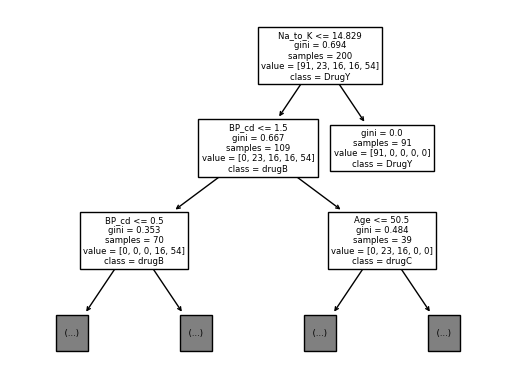

In [17]:
# 처음 설치 (처음 할때는 주석 풀고 진행) 
# !pip install -r requirements.txt

# 불러오기
import pandas as pd
data = pd.read_csv('./Dataset/Dataset_02.csv')

# 데이터확인
data.info()
print(data.head(2))

########################## 여성으로서 혈압HIGHT, 콜레스테롤NORMAL 환자의 전체대비비율을 구하라

# 전체대비비율표 
q1 = pd.crosstab(
    index = [data.Sex,data.BP],columns=data.Cholesterol, normalize=True)
print(q1)

# 해당 조건값만 
print(f'\n해당 환자의 전체대비비율은 {q1.loc[("F", "HIGH"), "NORMAL"]}입니다.\n')

########################## Drug타입관련 영향력확인위해, 독립성검정 후 가장 연관성이 큰 p-value를 구하라

# 원본복사
q2 = data.copy()

# 수치형 컬럼 --> 범주형(그룹형)컬럼으로 추가
import numpy as np

q2['Age_gr'] = np.where(q2.Age < 20, 10 , 
                       np.where(q2.Age < 30, 20, 
                               np.where(q2.Age < 40 , 30 , 
                                       np.where(q2.Age < 50 , 40 , 
                                               np.where(q2.Age < 60, 50 , 60)))))
q2['Na_k_gr'] = np.where(q2.Na_to_K <= 10, 'Lv1', 
                        np.where(q2.Na_to_K <= 20, 'Lv2', 
                                np.where(q2.Na_to_K <=30, 'Lv3','Lv4')))
print(q2.columns)

# 독립성검증(카이스퀘어: 범주형그룹형 타입을 검증)에 필요한 변수
features = ['Sex', 'BP', 'Cholesterol', 'Age_gr','Na_k_gr']

# 독립성검증(카이스퀘어)함수
from scipy.stats import chi2_contingency

# 독립성검증(카이스퀘어)진행 : 각 변수들의 빈도표crosstab과 pvalue추출 
answer=[]

for i in features : 
    tab = pd.crosstab(index=q2[i],columns=q2['Drug'])
    pvalue= chi2_contingency(tab)[1] 
    answer.append([i,pvalue])
    
answer = pd.DataFrame(answer, columns = ['features','pvalue'])

# 유의수준(0.05기준)보다 작은 변수(연관성이있음)중에 pvalue값이 가장 큰 값 
# answer['pvalue']<0.05 하면 True로 나옴 = 연관성이 있음 

for_drug = answer[answer['pvalue']<0.05] 
for_drug_max=for_drug.loc[for_drug['pvalue'].idxmax()]
print(f'\n유의수준0.05보다 작은 변수들과 pvalue값\n{for_drug}\n')
print(f'그 중에서 영향력(pvalue값)이 가장 큰 변수와 pvalue값\n{for_drug_max}\n')

answer[answer['pvalue']<0.05]['pvalue'].max()

########################## 의사결정나무를 수행하여, Root Node의 split value를 구하라

# 원본복사
q3 = data.copy()

# 범주형(그룹형) 컬럼 --> 수치형 컬럼으로 추가
mapping_sex = {'M': 0, 'F': 1}
q3['Sex_cd'] = q3['Sex'].replace(mapping_sex)

mapping_bp = {'LOW': 0, 'NORMAL': 1, 'HIGH': 2}
q3['BP_cd'] = q3['BP'].replace(mapping_bp)

mapping_ch = {'HIGH': 1, 'NORMAL':0}
q3['Ch_cd'] = q3['Cholesterol'].replace(mapping_ch)

print(q3.columns)

# 의사결정나무 수행 및 시각화 
from sklearn.tree import DecisionTreeClassifier, plot_tree 

features = ['Age','Na_to_K','Sex_cd','BP_cd','Ch_cd']

model = DecisionTreeClassifier().fit(q3[features],q3.Drug)

plot_tree(
    model, 
    max_depth=2,     # 2로 가정 
    feature_names=features, 
    # class_names=q3.Drug.unique(),  # error나는경우
    class_names=q3.Drug.unique().tolist(),
    precision=3      # 소숫점 3자리까지 
);

print(f'\nRoot Node의 split value는 14.829입니다.')

# 복습

In [1]:
# 처음 설치 (처음 할때는 주석 풀고 진행) 

# 불러오기


########################## 여성으로서 혈압HIGHT, 콜레스테롤NORMAL 환자의 전체대비비율을 구하라


########################## Drug타입(y)와의 영향력 확인위해, 각 x변수들과의 독립성검정 후 가장 연관성이 큰 p-value를 구하라


########################## 의사결정나무를 수행하여, Root Node의 split value를 구하라



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB
   Age Sex      BP Cholesterol  Na_to_K   Drug
0   23   F    HIGH        HIGH   25.355  DrugY
1   47   M     LOW        HIGH   13.093  drugC
2   47   M     LOW        HIGH   10.114  drugC
3   28   F  NORMAL        HIGH    7.798  drugX
4   61   F     LOW        HIGH   18.043  DrugY
----------------------------------------
Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')
------------------>   빈도표  틀렸다   <-----------------------
------------------>   빈도표  틀렸다   <-----

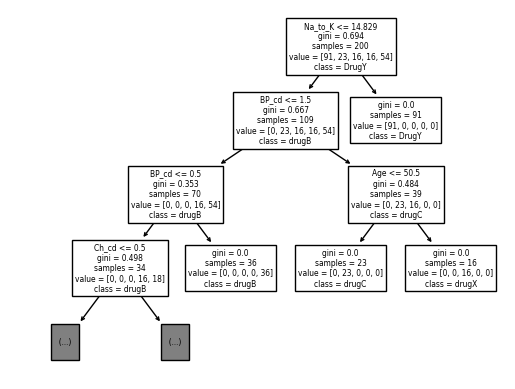

In [105]:
# 처음 설치 (처음 할때는 주석 풀고 진행) 
# !pip install -r requirements.txt

# 불러오기
import pandas as pd
data = pd.read_csv('./Dataset/Dataset_02.csv')
data.info()
print(data.head())

print('----------------------------------------')
########################## 여성으로서 혈압HIGHT, 콜레스테롤NORMAL 환자의 전체대비비율을 구하라
print(data.columns)
# x = Sex, BP, Cholesterol 

# pd.crosstab?
# pd.crosstab(
#     index,
#     columns,
#     values=None,
#     rownames=None,
#     colnames=None,
#     aggfunc=None,
#     margins: 'bool' = False,
#     margins_name: 'Hashable' = 'All',
#     dropna: 'bool' = True,
#     normalize: 'bool' = False,

#pd.crosstab(index = [('Sex','BP')],columns = 'Cholesterol',normalize = True)
print('------------------>   빈도표  틀렸다   <-----------------------')
#pd.crosstab(index = [(data.Sex,data.BP)],columns = data.Cholesterol, normalize = True)
print('------------------>   빈도표  틀렸다   <-----------------------')
pd.crosstab(index = [data.Sex,data.BP],columns = data.Cholesterol, normalize = True)

q1 = pd.crosstab(index = [data.Sex,data.BP],columns = data.Cholesterol, normalize = True)
q1
print(q1)

q1.loc[('F','HIGH'),'NORMAL']
q1_answer = q1.loc[('F','HIGH'),'NORMAL']
print(f'1. 해당환자의 전체대비비율은 {q1_answer}이며, 반올림한 최종값은 {q1_answer:.3f}입니다.')

print('----------------------------------------')
########################## Drug타입(y)와의 영향력 확인위해, 각 x변수들과의 독립성검정 후 가장 연관성이 큰 p-value를 구하라
import numpy as np
q2=data.copy()
q2['Age_gr'] = np.where(q2.Age < 20, 10,
                        np.where(q2.Age < 30 , 20, 
                            np.where(q2.Age < 40 , 30, 
                                    np.where(q2.Age < 50 , 40, 
                                            np.where(q2.Age < 60, 50, 60)))))
q2.head()
q2['Na_K_gr'] = np.where(q2.Na_to_K <= 10 , 'Lv1', 
                        np.where(q2.Na_to_K <= 20 , 'Lv2', 
                                np.where(q2.Na_to_K <=30 , 'Lv3', 'Lv4')))
print(q2.head())
q2.info()

# 독립성 검정할 변수 x변수들 data type 그룹형임 = 카이스퀘어검정 = chi2
features = ['Sex','BP','Cholesterol','Age_gr','Na_K_gr']  # x들임

print('------------------>   카이스퀘어 다 틀렸다   <-----------------------')
from scipy.stats import chi2_contingency

# pd.crosstab?
# pd.crosstab(
#     index,
#     columns,
#     values=None,
#     rownames=None,
#     colnames=None,
#     aggfunc=None,
#     margins: 'bool' = False,
#     margins_name: 'Hashable' = 'All',
#     dropna: 'bool' = True,
#     normalize: 'bool' = False,
# ) -> 'DataFrame'

answer = []
for i in features : 
    # tab = pd.crosstab(q2[features],q2.Drug)
    tab = pd.crosstab(index = q2[i],columns = q2.Drug)
    pvalue = chi2_contingency(tab)[1]
    answer.append([i,pvalue])

print(answer)

answer = pd.DataFrame (answer, columns = ['features','pvalue'])
print(answer)

print('----------------------------------------')

answer['pvalue'] < 0.05
print(answer['pvalue'] < 0.05)

answer[answer['pvalue'] < 0.05]
print(answer[answer['pvalue'] < 0.05])

print('----------------------------------------')

answer[answer['pvalue'] < 0.05].max()
answer_pvalue = answer[answer['pvalue'] < 0.05].max()
print(f'2. 가장 큰 pvalue값은 Na_K_gr변수의 0.00070 입니다. \n{answer_pvalue}')

# ########################## 의사결정나무를 수행하여, Root Node의 split value를 구하라
q3 = data.copy()

q3['Sex'].unique()
mapping_sex = {'M':0, 'F':1}
q3['Sex_cd'] = q3['Sex'].replace(mapping_sex)
q3.head()

mapping_bp = {'LOW' : 0, 'NORMAL': 1, 'HIGH': 2}
q3['BP_cd'] = q3['BP'].replace(mapping_bp)
q3.head()

mapping_ch = {'NORMAL':0, 'HIGH': 1}
q3['Ch_cd'] = q3['Cholesterol'].replace(mapping_ch)
q3.head()

print('----------------------------------------')

q3_features = ['Age','Na_to_K','Sex_cd','BP_cd','Ch_cd']

from sklearn.tree import DecisionTreeClassifier, plot_tree

model = DecisionTreeClassifier().fit(q3[q3_features], q3.Drug)

# plot_tree?
# plot_tree(
#     decision_tree,
#     *,
#     max_depth=None,
#     feature_names=None,
#     class_names=None,
#     label='all',
#     filled=False,
#     impurity=True,
#     node_ids=False,
#     proportion=False,
#     rounded=False,
#     precision=3,
#     ax=None,
#     fontsize=None,
# )

plot_tree(
    model,
    max_depth=3, 
    feature_names=q3_features,
    #class_names=? 
    class_names= q3.Drug.unique().tolist(), 
    precision=3,
);
print(f'Root Node의 split value는 14.829입니다.')

print('------------------>   시각화 틀린부분 (model빼먹음,class_names 그리고 tolist주의)  <-----------------------')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB
Cholesterol   HIGH  NORMAL
Sex BP                    
F   HIGH     0.085   0.105
    LOW      0.070   0.070
    NORMAL   0.090   0.060
M   HIGH     0.090   0.105
    LOW      0.085   0.095
    NORMAL   0.095   0.050
      features        pvalue
0          Sex  7.138370e-01
1           BP  5.041733e-27
2  Cholesterol  5.962588e-04
3       Age_gr  7.010113e-04
4      Na_K_gr  1.125464e-14
      features        pvalue
1           BP  5.041733e-27
2  Cholesterol  5.962588e-04
3       Age_gr  7.010

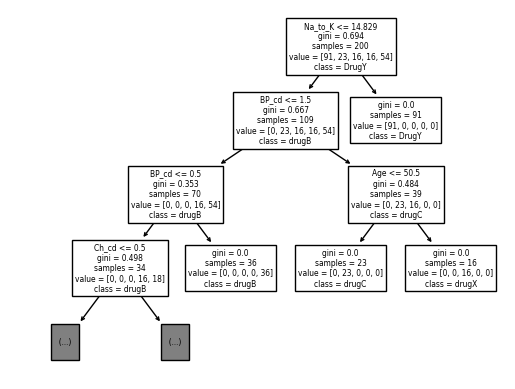

In [136]:
# 처음 설치 (처음 할때는 주석 풀고 진행) 
# !pip install -r requirments.txt 

# 불러오기
import pandas as pd
data = pd.read_csv('./Dataset/Dataset_02.csv')
data.info()

########################## 여성으로서 혈압HIGHT, 콜레스테롤NORMAL 환자의 전체대비비율을 구하라
q1=\
pd.crosstab(index=[data.Sex, data.BP],columns=data.Cholesterol, normalize=True)
print(q1)

########################## Age_gr, Na_K_gr 컬럼 생성 (기존 수치형 --> 범주형 추가 )
q2 = data.copy()

q2['Age_gr'] = np.where(q2.Age < 20 , 10 ,           # Age가 20미만이면 10, 아니면 
                        np.where(q2.Age < 30 , 20 , 
                                 np.where(q2.Age < 40 , 30 , 
                                          np.where(q2.Age < 50 , 40 ,
                                                   np.where(q2.Age < 60 , 50 , 
                                                            60 )))))
          
q2['Na_K_gr'] = np.where(q2.Na_to_K <= 10 , 'Lv1',           # Na_to_k가 10이하면 'Lv1'로 
                        np.where(q2.Na_to_K <= 20 , 'Lv2', 
                                 np.where(q2.Na_to_K <= 30 , 'Lv3',
                                          'Lv4' )))

########################## Drug타입(y)와의 영향력 확인위해, 각 x변수들과의 독립성검정 후 가장 연관성이 큰 p-value를 구하라

# 독립성 검증에 필요한 변수 추출 
features = ['Sex', 'BP', 'Cholesterol', 'Age_gr','Na_K_gr']

# 독립성 검증 = 카이스퀘어로 진행 = 함수 
from scipy.stats import chi2_contingency

# 독립성 검증 진행 = features의 변수 하나하나 = x하나 , y하나 = 조건문 = 빈도crosstab과 pvalue 구하기
answer=[]
for i in features : 
    tab = pd.crosstab(index=q2[i], columns=q2.Drug) # chi2수행하기위해 진행한다. 
    pvalue = chi2_contingency(tab)[1]               # pvalue에는 crosstab이 들어간다. 우리가 필요한건 pvalue의 인덱스만 
    answer.append([i,pvalue])                       # 변수 하나하나, pvalue(인덱스만추출됨)

# 결과값 데이터프레임으로 
answer = pd.DataFrame(answer, columns = ['features','pvalue'])
print(answer)

# pvalue값이 유의수준0.05보다 작은(영향력이 있는)변수만 
answer[answer['pvalue']<0.05]
pvalue_05 = answer[answer['pvalue']<0.05]
print(pvalue_05)

# 그 중 가장 영향력이 있는 변수와 pvalue
pvalue_05.max()

########################## 의사결정나무를 수행하여, Root Node의 split value를 구하라
# 원본복사
q3 = data.copy()

# 범주형(그룹형) 컬럼 --> 수치형 컬럼으로 추가
mapping_sex = {'M': 0, 'F': 1}
q3['Sex_cd'] = q3['Sex'].replace(mapping_sex)

mapping_bp = {'LOW': 0, 'NORMAL': 1, 'HIGH': 2}
q3['BP_cd'] = q3['BP'].replace(mapping_bp)

mapping_ch = {'HIGH': 1, 'NORMAL':0}
q3['Ch_cd'] = q3['Cholesterol'].replace(mapping_ch)

from sklearn.tree import DecisionTreeClassifier, plot_tree

tree_features =  ['Age','Na_to_K','Sex_cd','BP_cd','Ch_cd']

model = DecisionTreeClassifier().fit(q3[tree_features], q3.Drug)

# plot_tree?
# plot_tree(
#     decision_tree,
#     *,
#     max_depth=None,
#     feature_names=None,
#     class_names=None,
#     label='all',
#     filled=False,
#     impurity=True,
#     node_ids=False,
#     proportion=False,
#     rounded=False,
#     precision=3,
#     ax=None,
#     fontsize=None,
# )
plot_tree(
    model, 
    max_depth=3, 
    feature_names=tree_features,  # q3.tree_features가 아니다.
    class_names=q3.Drug.unique().tolist(), # 여긴 q3.해야함 그리고 Unique()랑 tolist() 잊지말자
    precision=3,
);